## MOVING AVERAGE
It is calculated by averaging data of the time series within k periods of time

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from datetime import datetime
%matplotlib inline

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

- Load Dataset

In [2]:
df = pd.read_csv('/home/forhad/Study/Self_Work/shazad/EDA/Stainless-Steel-Prices-Forecasty-Assignment.csv')

In [3]:
df.head()

,Date,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
0,07-01-2013,0.827352,20575,10568,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062,98.80018,99.64265,100.1044,101.1423,99.43615,100.6230,50.9,6906.64
1,08-01-2013,0.760221,20609,10821,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,106.546364,1132,99.04874,99.91766,100.3962,101.1938,99.64082,100.6545,55.4,7186.25
2,09-01-2013,0.784715,20761,10774,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,106.313810,2003,99.27196,100.18490,100.5363,101.2066,99.84383,100.6646,55.7,7159.27
3,10-01-2013,0.769293,20735,11291,132.572727,85.443634,229.393932,14117.65217,1884.836957,-0.1,100.500435,1504,99.40488,100.36330,100.5771,101.1835,100.02300,100.6666,56.2,7203.02
4,11-01-2013,0.750242,20854,11559,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,93.812381,1821,99.36221,100.49830,100.5459,101.1283,100.17150,100.6744,56.4,7070.65


In [4]:
import datetime
Date = pd.to_datetime(df.Date, format='%d-%m-%Y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      84 non-null     object 
 1   StainlessSteelPrice       84 non-null     float64
 2   Steel_Inventory_M_USD     84 non-null     int64  
 3   Steel_Orders_M_USD        84 non-null     int64  
 4   IronOre_Global_USD        84 non-null     float64
 5   CoalAustralia_Global_USD  84 non-null     float64
 6   Energy_Index              84 non-null     float64
 7   Nickel_Global_USD         84 non-null     float64
 8   Zinc_Global_USD           84 non-null     float64
 9   Freight_Transport_Index   84 non-null     float64
 10  WTI_Crude_Global_USD      84 non-null     float64
 11  Baltic_Dry_Index          84 non-null     int64  
 12  BCI_China                 84 non-null     float64
 13  BCI_Europe                84 non-null     float64
 14  BCI_US      

## Simple Moving Average

<AxesSubplot:>

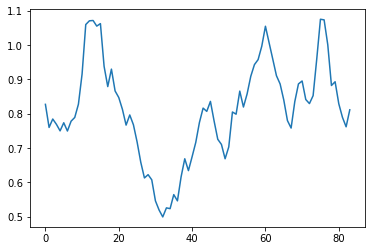

In [6]:
df['StainlessSteelPrice'].plot()

In [7]:
sma = df['StainlessSteelPrice'].to_frame()
  
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 30
sma['SMA30'] = sma['StainlessSteelPrice'].rolling(30).mean()
  
# removing all the NULL values using 
# dropna() method
sma.dropna()

,StainlessSteelPrice,SMA30
29,0.607814,0.829046
30,0.546579,0.819687
31,0.519817,0.811673
32,0.499859,0.802178
33,0.526167,0.794074
34,0.523899,0.786529
35,0.564723,0.779559
36,0.546579,0.772785
37,0.616432,0.767388
38,0.669049,0.763381


<AxesSubplot:>

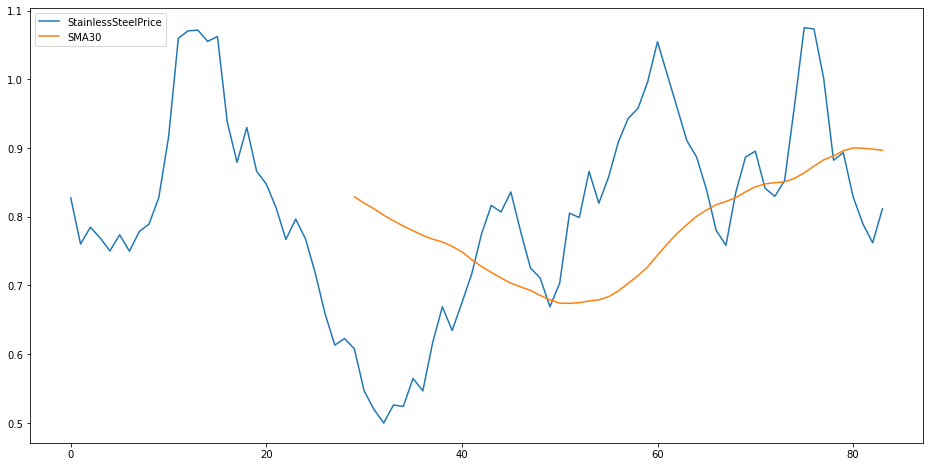

In [8]:
#Plotting Graph of SMA
sma[['StainlessSteelPrice', 'SMA30']].plot(label='df', 
                                  figsize=(16, 8))

## Cumulative Moving Average

In [9]:
cma = df['StainlessSteelPrice'].to_frame()
  
# calculating cumulative moving
# average using .expanding().mean()
cma['CMA30'] = cma['StainlessSteelPrice'].expanding().mean()

In [10]:
#Cumulative Moving Average Mean Value
cma['CMA30']

0     0.827352
1     0.793787
2     0.790763
3     0.785395
4     0.778365
        ...   
79    0.811346
80    0.811566
81    0.811300
82    0.810706
83    0.810715
Name: CMA30, Length: 84, dtype: float64

<AxesSubplot:>

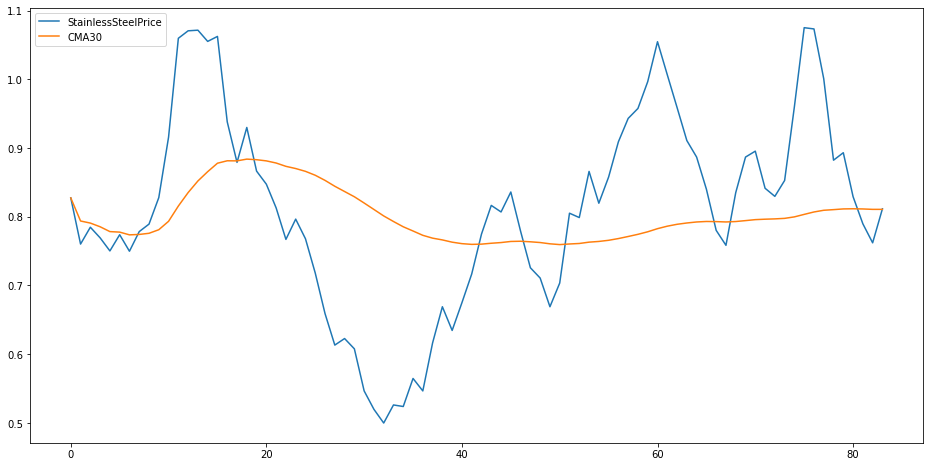

In [11]:
#Plotting Graph of CMA
cma[['StainlessSteelPrice', 'CMA30']].plot(label='CMA', 
                                  figsize=(16, 8))

## Exponential Moving Average

In [12]:
ema = df['StainlessSteelPrice'].to_frame()

# calculating exponential moving average
# using .ewm(span).mean() , with window size = 30
ema['EWMA30'] = ema['StainlessSteelPrice'].ewm(span=30).mean()

In [13]:
#Exponential Moving Average Mean Value
ema['EWMA30']

0     0.827352
1     0.792668
2     0.789838
3     0.784177
4     0.776456
        ...   
79    0.885429
80    0.881783
81    0.875817
82    0.868447
83    0.864758
Name: EWMA30, Length: 84, dtype: float64

<AxesSubplot:>

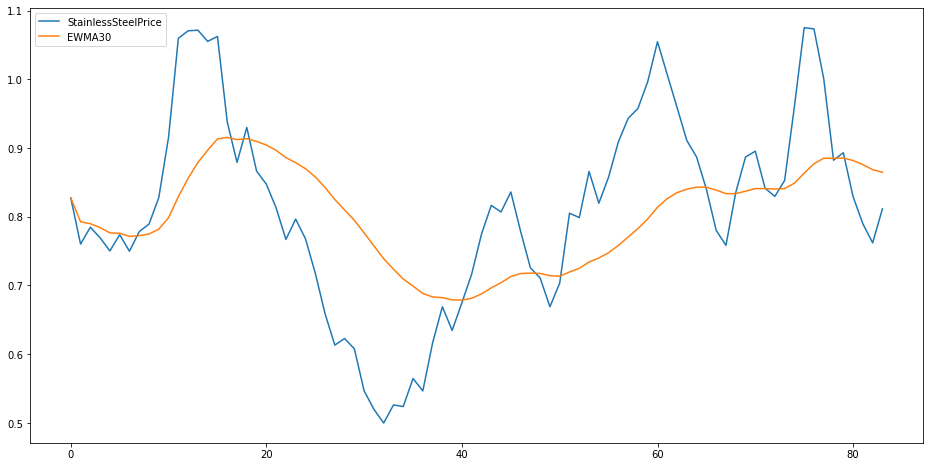

In [14]:
ema[['StainlessSteelPrice', 'EWMA30']].plot(label='EMA', 
                                  figsize=(16, 8))

## Final Results:
   - After performing Moving Average and Random Forest Regressor:
     By comparing the predicted values of both methods, we can say both algorithms can be used as there is not          much difference in the prediction (prediction values are almost same)